In [0]:
#Single layer neural network
import numpy as np
import torch  #Torch has interesting data structures. Everything in torch is a tensor.
import torchvision  #Library for processing images using torch


In [0]:
a = np.random.rand(2,3)
print(a)
b = torch.from_numpy(a)
print(b)


[[0.44840664 0.66576102 0.64752867]
 [0.0934169  0.55554957 0.98653307]]
tensor([[0.4484, 0.6658, 0.6475],
        [0.0934, 0.5555, 0.9865]], dtype=torch.float64)


In [0]:
A = torch.rand(2,2)
b = torch.rand(2,1)
x = torch.rand(2,1, requires_grad=True)
y = torch.matmul(A,x) + b
print(y)
z = y.sum()
print(z)
z.backward()
print(x.grad)
print(x)


tensor([[0.4082],
        [1.1844]], grad_fn=<AddBackward0>)
tensor(1.5926, grad_fn=<SumBackward0>)
tensor([[1.4977],
        [0.7305]])
tensor([[0.2975],
        [0.1143]], requires_grad=True)


Implement torch to train a neural network.

In [0]:
trainingdata = torchvision.datasets.FashionMNIST('./FashionMNIST/',train=True,download=True,transform=torchvision.transforms.ToTensor())
testdata = torchvision.datasets.FashionMNIST('./FashionMNIST/',train=False,download=True,transform=torchvision.transforms.ToTensor())

In [0]:
print(len(trainingdata),len(testdata))


60000 10000


In [0]:
image, label = trainingdata[0]
print(image.shape, label)


torch.Size([1, 28, 28]) 9


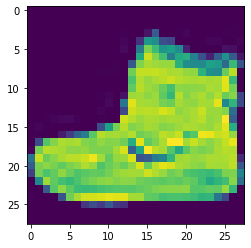

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(image.squeeze().numpy())
plt.show()

In neural nets, we take batches of data to train and test your network.
 

In [0]:
trainDataLoader = torch.utils.data.DataLoader(trainingdata, batch_size=64,shuffle=True) 
testDataLoader = torch.utils.data.DataLoader(testdata, batch_size=64,shuffle=False)


In [0]:
images, labels = iter(trainDataLoader).next()   #the function iter is used to iterate along the batches of data as we use Stochastic Gradient Descent to train our data
print(images.size(), labels)

torch.Size([64, 1, 28, 28]) tensor([6, 9, 0, 3, 7, 1, 7, 2, 1, 5, 6, 2, 1, 0, 3, 8, 2, 6, 0, 5, 2, 4, 5, 2,
        9, 0, 5, 4, 3, 3, 5, 3, 5, 3, 3, 7, 9, 2, 7, 7, 5, 1, 1, 4, 3, 1, 9, 7,
        6, 7, 0, 8, 8, 5, 5, 2, 2, 1, 5, 3, 0, 9, 7, 7])


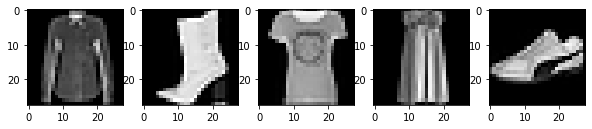

In [0]:
plt.figure(figsize=(10,4))
for index in np.arange(0,5):
  plt.subplot(1,5,index+1)
  plt.imshow(images[index].squeeze().numpy(),cmap=plt.cm.gray)

In [0]:
class LinearReg(torch.nn.Module):
  def __init__(self):
    super(LinearReg, self).__init__()
    self.linear = torch.nn.Linear(28*28,10)
  def forward(self, x):
    x = x.view(-1,28*28)  #Remove the first layer and then flatten it
    transformed_x = self.linear(x)   #Apply the linear regression to the data
    return transformed_x

#We have to initialize our net, a loss function and set up an optimizer
net = LinearReg().cuda()
Loss = torch.nn.CrossEntropyLoss()    #Cross entropy loss combines nn.LogSoftmax() and nn.NLLLoss() in one single class.
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)   #In SGD, the lr changes for every epoch. Torch takes care of that.

In [0]:
train_loss_history = []
test_loss_history = []
for epoch in range(20):
  train_loss = 0.0
  test_loss = 0.0
  for i, data in enumerate(trainDataLoader):
    images, labels = data
    images = images.cuda()
    labels = labels.cuda()
    optimizer.zero_grad()   #We have to zero out the gradients for every epoch
    predicted_output = net(images)
    fit = Loss(predicted_output,labels)
    fit.backward()    #Calculates the gradients
    optimizer.step()    #Updates the weight at each step
    train_loss += fit.item()  #fit.item() records the training loss for each batch
  for i, data in enumerate(testDataLoader):
    with torch.no_grad():
      images, labels = data
      images = images.cuda()
      labels = labels.cuda()
      predicted_output = net(images)
      fit = Loss(predicted_output,labels)
      test_loss += fit.item()
  train_loss = train_loss/len(trainDataLoader)
  test_loss = test_loss/len(testDataLoader)
  train_loss_history.append(train_loss)
  test_loss_history.append(test_loss)
  print('Epoch %s, Train loss %s, Test loss %s'%(epoch, train_loss, test_loss))

Epoch 0, Train loss 0.9684898734473979, Test loss 0.7406804736252803
Epoch 1, Train loss 0.6701972919867746, Test loss 0.6468320826815951
Epoch 2, Train loss 0.6052594762811783, Test loss 0.6044639307222549
Epoch 3, Train loss 0.5699082587891297, Test loss 0.5790275601065082
Epoch 4, Train loss 0.5466358670865549, Test loss 0.5610133434177205
Epoch 5, Train loss 0.5297689308712223, Test loss 0.5468637248513045
Epoch 6, Train loss 0.5168709191622765, Test loss 0.5367324215591334
Epoch 7, Train loss 0.5068738130745349, Test loss 0.527452799734796
Epoch 8, Train loss 0.49842745065689087, Test loss 0.5209442796600852
Epoch 9, Train loss 0.4909894394753838, Test loss 0.5144804044134298
Epoch 10, Train loss 0.4847249198697015, Test loss 0.5119647334335716
Epoch 11, Train loss 0.47942900443191466, Test loss 0.5052634950276393
Epoch 12, Train loss 0.4745510842786161, Test loss 0.5019163887971526
Epoch 13, Train loss 0.4706734181212972, Test loss 0.49789935919889217
Epoch 14, Train loss 0.46663

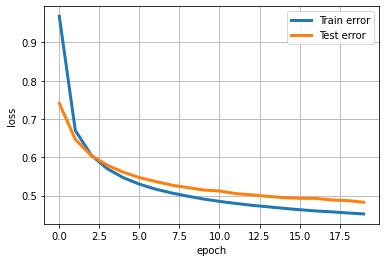

In [0]:
plt.plot(range(20),train_loss_history,'-',linewidth=3,label='Train error')
plt.plot(range(20),test_loss_history,'-',linewidth=3,label='Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()

In [0]:
predicted_output = net(images)
print("Heyy")
print(torch.max(predicted_output, 1))
fit = Loss(predicted_output, labels)
print("R")
print(labels)

Heyy
torch.return_types.max(
values=tensor([ 6.1352,  3.1216,  9.0465,  7.9219,  6.5574,  6.2158, 10.3964,  4.3390,
         6.9929, 11.5915, 10.5427, 10.2443,  6.9226,  4.7382,  9.5414,  4.4561],
       device='cuda:0', grad_fn=<MaxBackward0>),
indices=tensor([3, 1, 7, 5, 8, 2, 5, 6, 8, 9, 1, 9, 1, 8, 1, 5], device='cuda:0'))
R
tensor([3, 2, 7, 5, 8, 4, 5, 6, 8, 9, 1, 9, 1, 8, 1, 5], device='cuda:0')


In [0]:
def evaluate(dataloader):
  total, correct = 0, 0
  net.eval() # don't update weights
  for data in dataloader:
    images, labels = data
    images = images.cuda()
    labels = labels.cuda()
    predicted_output = net(images)
    _, predicted_labels = torch.max(predicted_output,1)
    total += labels.size(0)
    correct += (predicted_labels == labels).sum().item()
  return 100 * correct/total

print('Train acc = %0.2f, test acc = %0.2f' % (evaluate(trainDataLoader), evaluate(testDataLoader)))

Train acc = 84.93, test acc = 83.45


tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 2, 8, 0, 6, 7, 7, 7,
        1, 2, 6, 0, 9, 4, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 3, 9, 6, 7, 2, 1,
        2, 6, 6, 2, 5, 6, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1, 0, 4, 7, 8, 7, 0,
        6, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 6, 5, 3, 6, 7, 1, 8,
        0, 1, 6, 2, 3, 6, 7, 6, 7, 8, 5, 9, 9, 4, 2, 5, 7, 0, 5, 2, 8, 4, 7, 8,
        0, 0, 9, 9, 3, 0, 8, 4, 1, 5, 4, 1, 9, 1, 8, 4, 2, 1, 2, 5, 1, 0, 0, 0,
        1, 6, 1, 3, 2, 2, 6, 2, 1, 3, 5, 0, 4, 7, 9, 3, 7, 2, 3, 9, 0, 9, 4, 7,
        4, 2, 6, 5, 2, 1, 2, 1, 3, 0, 9, 1, 0, 9, 3, 8, 7, 9, 9, 4, 4, 7, 1, 2,
        1, 6, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3,
        1, 6, 7, 4, 8, 5, 3, 0, 7, 7, 6, 6, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 4, 2,
        5, 4, 9, 6, 2, 8, 6, 4, 6, 4, 9, 7, 4, 5, 5, 4, 8, 5, 2, 3, 0, 4, 8, 0,
        0, 6, 3, 8, 9, 6, 1, 3, 0, 4, 3, 0, 8, 3, 7, 4, 0, 1, 2, 3, 0, 6, 6, 7,
        5, 3, 5, 9, 5, 6, 5, 5, 1, 9, 8,

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


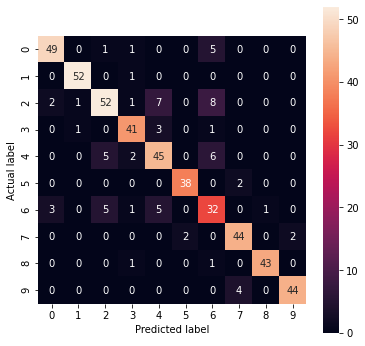

In [0]:
testDataLoader = torch.utils.data.DataLoader(testdata, batch_size=512, shuffle=False)
images, labels = iter(testDataLoader).next()
images = images.cuda()
labels = labels.cuda()
predicted_output = net(images)
_, predicted_labels = torch.max(predicted_output,1)
print(predicted_labels)

images = images.cpu()
labels = labels.cpu().numpy()
predicted_labels = predicted_labels.cpu().numpy()

from sklearn import metrics
conf_matrix = metrics.confusion_matrix(labels, predicted_labels)

import seaborn as sns
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

Multilayer neural network for the same dataset

Extracting ./FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw


Extracting ./FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



Extracting ./FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw


Extracting ./FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw
Processing...
Done!





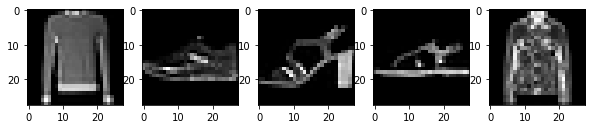

In [0]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
%matplotlib inline

trainingdata = torchvision.datasets.FashionMNIST('./FashionMNIST/',train=True,download=True,transform=torchvision.transforms.ToTensor())
testdata = torchvision.datasets.FashionMNIST('./FashionMNIST/',train=False,download=True,transform=torchvision.transforms.ToTensor())

trainDataLoader = torch.utils.data.DataLoader(trainingdata, batch_size=16, shuffle=True)
testDataLoader = torch.utils.data.DataLoader(testdata, batch_size=16, shuffle=False)
images, labels = iter(trainDataLoader).next()
plt.figure(figsize=(10,4))
for index in np.arange(0,5):
  plt.subplot(1,5,index+1)
  plt.imshow(images[index].squeeze().numpy(),cmap=plt.cm.gray)

In [0]:
#the "Net" class we have defined above creates an instance of the base class torch.nn.Module using Python's super(). 
#The next three lines defines the various layers. As is self-explanatory: there are three sets of weights (of sizes, 784 x 200, 200 x 100, and 100 x 10).
#Once we define these layers of edges, we need to connect them via neurons with activation functions. Let us just use ReLUs.
class Net(torch.nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc_model = torch.nn.Sequential(   #Sequential is used to add certain layers to a class
    torch.nn.Linear(28 * 28, 200),
    torch.nn.ReLU(),
    torch.nn.Linear(200, 100),
    torch.nn.ReLU(),
    torch.nn.Linear(100, 10))

  def forward(self, x):
    x = x.view(-1,28*28)    
    x = self.fc_model(x)
    return x

In tensors, we only have to define the forward pass. The backward pass is done by the network by using back propogation on its own.

In [0]:
net = Net().cuda()
print(net)


Net(
  (fc_model): Sequential(
    (0): Linear(in_features=784, out_features=200, bias=True)
    (1): ReLU()
    (2): Linear(in_features=200, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=10, bias=True)
  )
)


In [0]:
net = Net().cuda()
Loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)
                            
train_loss_history = []
test_loss_history = []
num_epochs = 30


for epoch in range(num_epochs):
  train_loss = 0.0
  test_loss = 0.0
  for i, data in enumerate(trainDataLoader):
    images, labels = data
    images = images.cuda()
    labels = labels.cuda()
    optimizer.zero_grad()
    predicted_output = net(images)
    fit = Loss(predicted_output,labels)
    fit.backward()
    optimizer.step()
    train_loss += fit.item()
  for i, data in enumerate(testDataLoader):
    with torch.no_grad():
      images, labels = data
      images = images.cuda()
      labels = labels.cuda()
      predicted_output = net(images)
      fit = Loss(predicted_output,labels)
      test_loss += fit.item()
  train_loss = train_loss/len(trainDataLoader)
  test_loss = test_loss/len(testDataLoader)
  train_loss_history.append(train_loss)
  test_loss_history.append(test_loss)
  print('Epoch %s, Train loss %s, Test loss %s'%(epoch, train_loss, test_loss))

Epoch 0, Train loss 0.5446817728996277, Test loss 0.45754135055541995
Epoch 1, Train loss 0.39338362071116767, Test loss 0.39330954842567445
Epoch 2, Train loss 0.3536232289552689, Test loss 0.3804578238248825
Epoch 3, Train loss 0.3265627494017283, Test loss 0.3503796757698059
Epoch 4, Train loss 0.31007682784001034, Test loss 0.3996433512687683
Epoch 5, Train loss 0.2954013510862986, Test loss 0.37402358897924426
Epoch 6, Train loss 0.28309826552271844, Test loss 0.35513972473144534
Epoch 7, Train loss 0.271816521525383, Test loss 0.3365638613939285
Epoch 8, Train loss 0.26209675271312394, Test loss 0.3509829525709152
Epoch 9, Train loss 0.2536267522096634, Test loss 0.3628476068019867
Epoch 10, Train loss 0.24744762929081918, Test loss 0.3270291312932968
Epoch 11, Train loss 0.24002681536277135, Test loss 0.33887863073349
Epoch 12, Train loss 0.2328440691391627, Test loss 0.37765733330249784
Epoch 13, Train loss 0.2278284138997396, Test loss 0.3768974766969681
Epoch 14, Train loss 0

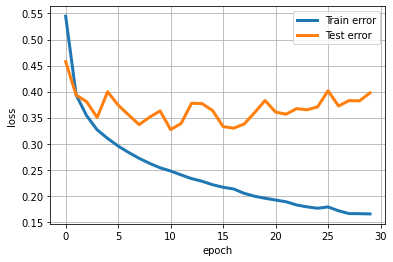

In [0]:
plt.plot(np.arange(num_epochs),train_loss_history,'-',linewidth=3,label='Train error')
plt.plot(np.arange(num_epochs),test_loss_history,'-',linewidth=3,label='Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()

In [0]:
def evaluate(dataloader):
  total, correct = 0, 0
  net.eval() # don't update weights
  for data in dataloader:
    images, labels = data
    images = images.cuda()
    labels = labels.cuda()
    predicted_output = net(images)
    _, predicted_labels = torch.max(predicted_output,1) #Returns the max values and the index position of the max value. The index position of the max value is the output label.
    total += labels.size(0)
    correct += (predicted_labels == labels).sum().item()
  return 100 * correct/total

print('Train acc = %0.2f, test acc = %0.2f' % (evaluate(trainDataLoader), evaluate(testDataLoader)))

Train acc = 93.94, test acc = 88.32


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


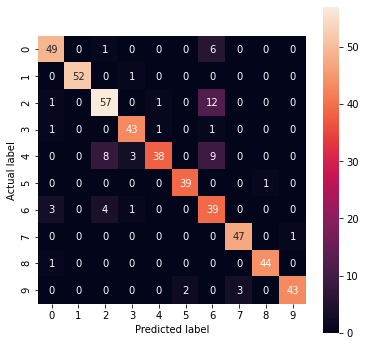

In [0]:
testDataLoader = torch.utils.data.DataLoader(testdata, batch_size=512, shuffle=False)
images, labels = iter(testDataLoader).next()
images = images.cuda()
labels = labels.cuda()
predicted_output = net(images)
_, predicted_labels = torch.max(predicted_output,1)

images = images.cpu()
labels = labels.cpu().numpy()
predicted_labels = predicted_labels.cpu().numpy()

from sklearn import metrics
conf_matrix = metrics.confusion_matrix(labels, predicted_labels)

import seaborn as sns
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

NLP Application

In [0]:
#NLP Application
%matplotlib inline

!wget https://download.pytorch.org/tutorial/data.zip #Command to download files in python
!unzip data.zip

from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os

def findFiles(path): return glob.glob(path) #finds all the pathnames matching a specified pattern

print("findFiles")
print(findFiles('data/names/*.txt'))

import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

# Turn a Unicode string to plain ASCII, thanks to http://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

--2020-04-21 07:30:19--  https://download.pytorch.org/tutorial/data.zip
Resolving download.pytorch.org (download.pytorch.org)... 13.224.164.78, 13.224.164.43, 13.224.164.6, ...
Connecting to download.pytorch.org (download.pytorch.org)|13.224.164.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2882130 (2.7M) [application/zip]
Saving to: ‘data.zip.5’

data.zip.5          100%[===================>]   2.75M  --.-KB/s    in 0.09s   

2020-04-21 07:30:20 (31.8 MB/s) - ‘data.zip.5’ saved [2882130/2882130]

Archive:  data.zip
replace data/eng-fra.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: data/eng-fra.txt        
  inflating: data/names/Arabic.txt   
  inflating: data/names/Chinese.txt  
  inflating: data/names/Czech.txt    
  inflating: data/names/Dutch.txt    
  inflating: data/names/English.txt  
  inflating: data/names/French.txt   
  inflating: data/names/German.txt   
  inflating: data/names/Greek.txt    
  inflating: data/names/Irish.txt    
 

In [0]:
!pwd

/content


In [0]:
category_lines = {}
all_categories = []

# Read a file and split into lines
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

for filename in findFiles('data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines
# print(all_categories)
# print(category_lines['Dutch'])
n_categories = len(all_categories)

In [0]:
print(category_lines['Chinese'][:5])

['Ang', 'AuYong', 'Bai', 'Ban', 'Bao']


In [0]:
import torch

def letterToIndex(letter):
    return all_letters.find(letter) #Find the lowest index of the letter in the string

def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# Turn a line into an array of one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

print(letterToTensor('B'))

print(lineToTensor('Bai'))

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0.

In [0]:
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line,'/category_tensor', category_tensor,'/line_tensor', line_tensor)

category = Scottish / line = Millar /category_tensor tensor([4]) /line_tensor tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0

In [0]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1) #Returns top k elements and indices of top k elements in the tensor
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

RNN having 57 input neurons, 128 hidden neurons and 18 output neurons

In [0]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

In [0]:
lr = 0.005
criterion = nn.NLLLoss()

def train(category_tensor,line_tensor):
  hidden=rnn.initHidden()
  rnn.zero_grad()
  for i in range(line_tensor.size()[0]):
    output, hidden = rnn(line_tensor[i],hidden)
  
  loss = criterion(output,category_tensor)
  loss.backward()

  for p in rnn.parameters():
    p.data.add_(-lr,p.grad.data) # Why have we considered a negative learning rate?
  
  return output, loss.item()
  
def test(line_tensor):
  hidden = rnn.initHidden()
  for i in range(line_tensor.size()[0]):
    output, hidden = rnn(line_tensor[i], hidden)

  return output

In [0]:
n_iters = 100000
print_every = 5000
plot_every = 1000

# Keep track of losses for plotting
current_loss = 0
all_losses = []


for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # Print iter number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = 'Y' if guess == category else 'N (%s)' % category
        print('%d %d%% %.4f %s / %s %s' % (iter, iter / n_iters * 100, loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 5% 2.8898 Broz / Spanish N (Polish)
10000 10% 1.7096 Kita / Japanese Y
15000 15% 1.5313 Hyun  / Korean Y
20000 20% 2.1865 Gottlieb / Russian N (German)
25000 25% 0.4107 Tokuda / Japanese Y
30000 30% 1.2610 O'Hannagain / Russian N (Irish)
35000 35% 0.4974 Dalianis / Greek Y
40000 40% 0.4843 Ziemniak / Polish Y
45000 45% 1.5946 Sheehy / Arabic N (Irish)
50000 50% 1.6258 Seow / Korean N (Chinese)
55000 55% 3.8815 Kennedy / Dutch N (Scottish)
60000 60% 0.4417 Nahas / Arabic Y
65000 65% 0.3775 Qiao / Chinese Y
70000 70% 2.3256 Medina / Czech N (Spanish)
75000 75% 1.9181 Isa / Japanese N (Arabic)
80000 80% 0.3749 Badyashin / Russian Y
85000 85% 3.3260 Castillion / Irish N (Spanish)
90000 90% 1.9303 De santigo / Japanese N (Portuguese)
95000 95% 0.1835 Xing / Chinese Y
100000 100% 1.8147 Pan / Vietnamese N (Chinese)


In [0]:
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = test(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

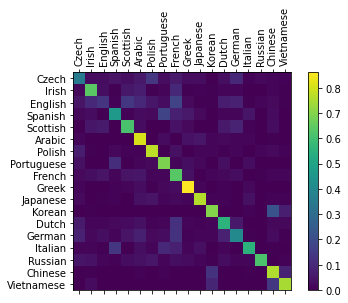

In [0]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.show()